b=2, c=1.5 | O=0.3333, Y=0.3334, B=0.3333


C:\Users\nicko\AppData\Local\Temp\ipykernel_21248\1110146743.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


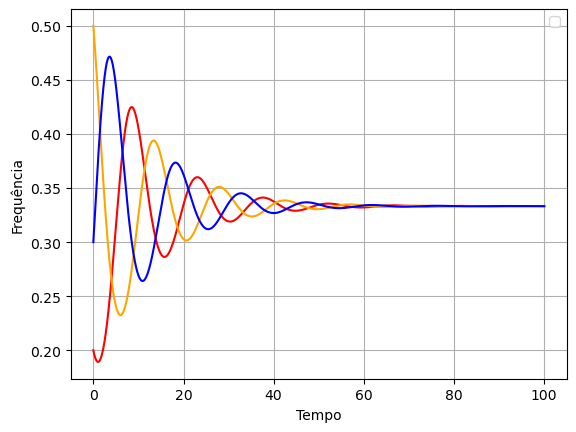

b=1.5, c=0.5 | O=0.3333, Y=0.3333, B=0.3334


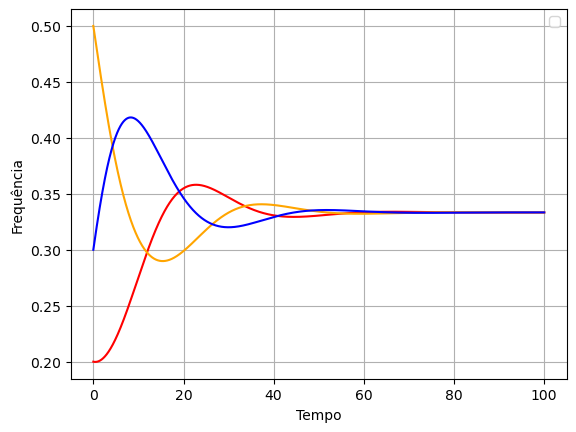

b=1.5, c=1 | O=0.3580, Y=0.1822, B=0.4598


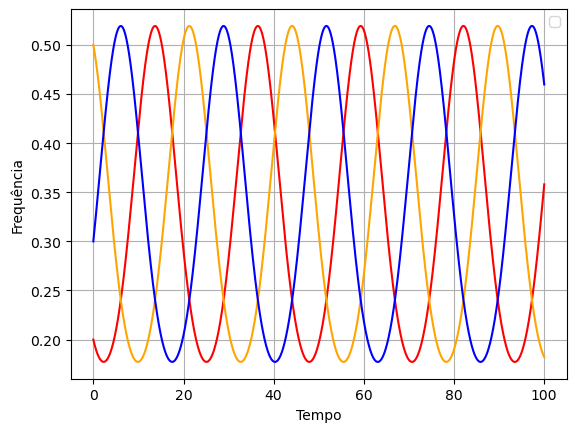

b=1.5, c=1.5 | O=0.0000, Y=0.0000, B=1.0000


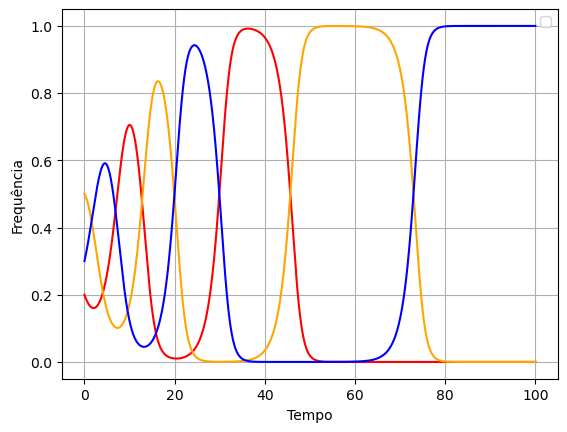

b=2, c=0.5 | O=0.3333, Y=0.3333, B=0.3333


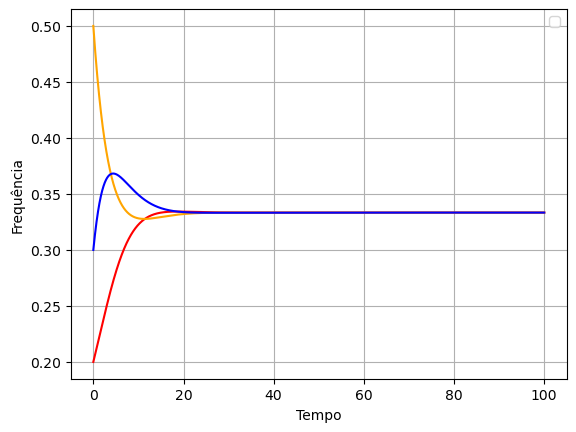

b=2, c=1 | O=0.3333, Y=0.3333, B=0.3333


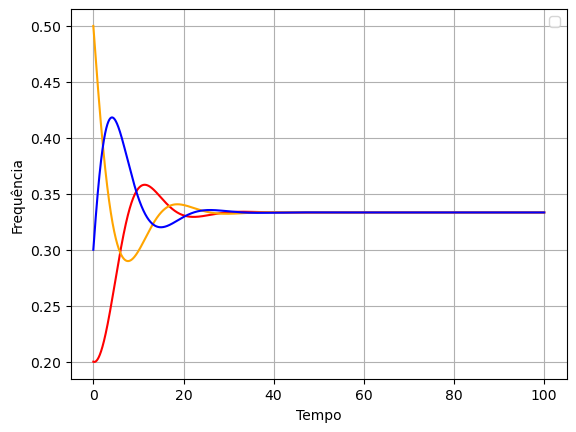

b=2, c=1.5 | O=0.3333, Y=0.3334, B=0.3333


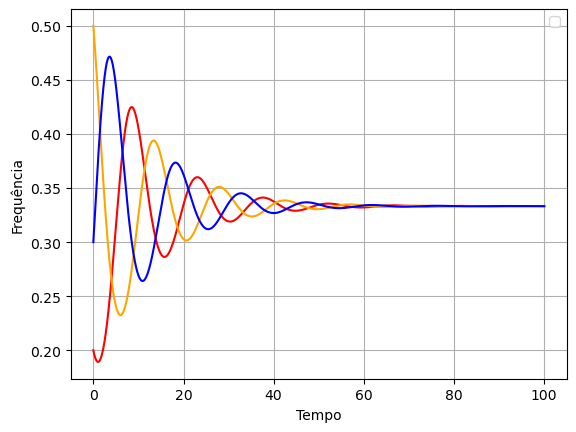

b=2.5, c=0.5 | O=0.3333, Y=0.3333, B=0.3333


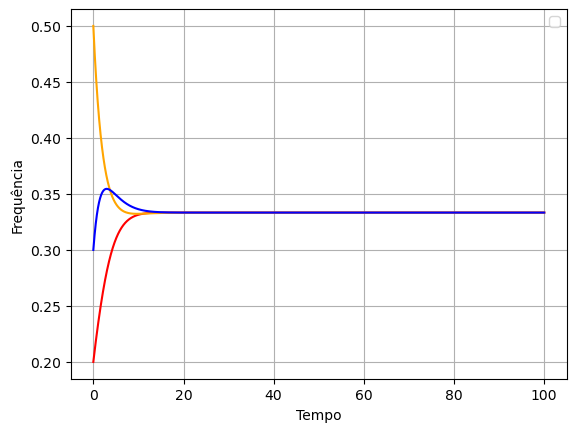

b=2.5, c=1 | O=0.3333, Y=0.3333, B=0.3333


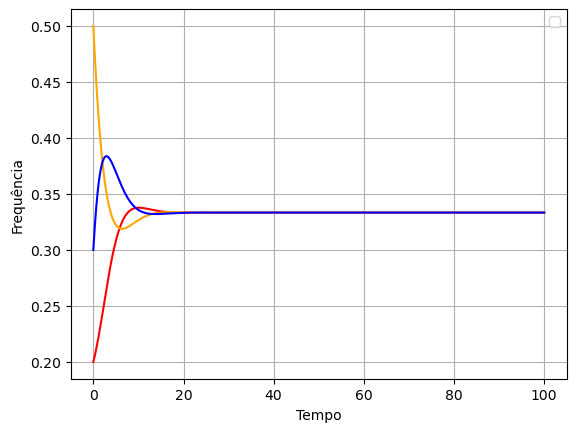

b=2.5, c=1.5 | O=0.3333, Y=0.3333, B=0.3333


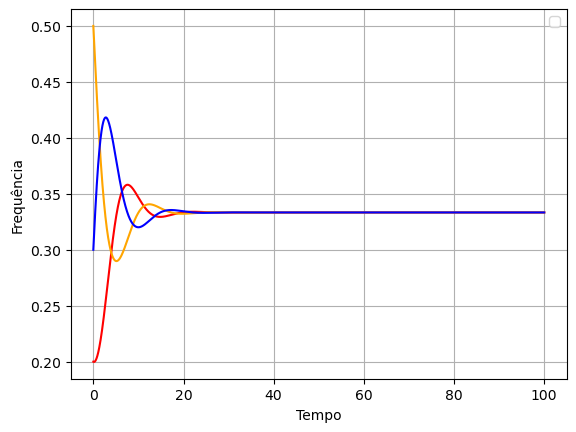

In [1]:
import matplotlib.pyplot as plt

def jogo_RPS(freq_inicial_O, freq_inicial_Y, b, c, t, dt=0.0001):
    freq_inicial_B = 1 - freq_inicial_O - freq_inicial_Y
    #                 O   Y   B
    matriz_payoff = [[1, b-c, b], # O
                     [b, 1, b-c], # Y
                     [b-c, b, 1]] # B

    lista_O = [freq_inicial_O]
    lista_Y = [freq_inicial_Y]
    lista_B = [freq_inicial_B]

    O, Y, B = freq_inicial_O, freq_inicial_Y, freq_inicial_B

    for _ in range(int(t/dt)):
        fitness_O = O * matriz_payoff[0][0] + Y * matriz_payoff[0][1] + B * matriz_payoff[0][2]
        fitness_Y = O * matriz_payoff[1][0] + Y * matriz_payoff[1][1] + B * matriz_payoff[1][2]
        fitness_B = O * matriz_payoff[2][0] + Y * matriz_payoff[2][1] + B * matriz_payoff[2][2]

        media_fitness = O * fitness_O + Y * fitness_Y + B * fitness_B

        derivada_O = O * (fitness_O - media_fitness)
        derivada_Y = Y * (fitness_Y - media_fitness)
        derivada_B = B * (fitness_B - media_fitness)

        O += derivada_O * dt
        Y += derivada_Y * dt
        B += derivada_B * dt

        lista_O.append(O)
        lista_Y.append(Y)
        lista_B.append(B)

    print(f"b={b}, c={c} | O={lista_O[-1]:.4f}, Y={lista_Y[-1]:.4f}, B={lista_B[-1]:.4f}")

    tempo = [i*dt for i in range(len(lista_O))]
    plt.plot(tempo, lista_O, color='red')
    plt.plot(tempo, lista_Y, color='orange')
    plt.plot(tempo, lista_B, color='blue')
    plt.xlabel('Tempo')
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid()
    plt.show()

# testando valores de b e c
c_valor = range(0, 3)
b_valor = range(1, 3)

jogo_RPS(0.2, 0.5, 2, 1.5, 100)

for b in [1.5, 2, 2.5]:
    for c in [0.5, 1, 1.5]:
        jogo_RPS(0.2, 0.5, b, c, 100)

Equações diferenciais:
dO/dt = -O*(B*(B + 0.5*O + 2*Y) - 2*B + O*(2*B + O + 0.5*Y) - O + Y*(0.5*B + 2*O + Y) - 0.5*Y)
dY/dt = -Y*(B*(B + 0.5*O + 2*Y) - 0.5*B + O*(2*B + O + 0.5*Y) - 2*O + Y*(0.5*B + 2*O + Y) - Y)
dB/dt = -B*(B*(B + 0.5*O + 2*Y) - B + O*(2*B + O + 0.5*Y) - 0.5*O + Y*(0.5*B + 2*O + Y) - 2*Y)


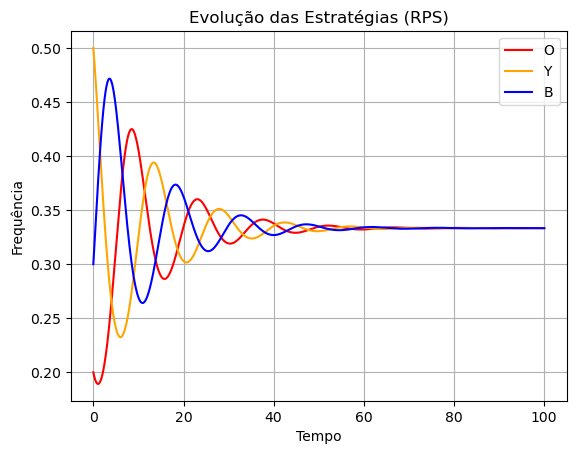

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

def jogo_RPS_symbolic(freq_inicial_O, freq_inicial_Y, b, c, t_max):
    # Variáveis simbólicas
    O, Y, B = sp.symbols('O Y B', real=True)

    # Matriz de payoff
    matriz_payoff = sp.Matrix([
        [1, b-c, b],   # O
        [b, 1, b-c],   # Y
        [b-c, b, 1]    # B
    ])

    # Vetor de frequências
    freq = sp.Matrix([O, Y, B])

    # Fitness de cada estratégia
    fitness = matriz_payoff * freq
    media_fitness = (freq.T * fitness)[0]

    # Equações diferenciais replicadoras
    derivadas = [sp.simplify(freq[i] * (fitness[i] - media_fitness)) for i in range(3)]

    print("Equações diferenciais:")
    print("dO/dt =", derivadas[0])
    print("dY/dt =", derivadas[1])
    print("dB/dt =", derivadas[2])

    # Transforma em função numérica para integração
    derivadas_func = sp.lambdify((O, Y, B), derivadas, "numpy")

    def sistema(t, y):
        dO, dY, dB = derivadas_func(y[0], y[1], y[2])
        return [dO, dY, dB]

    # Condições iniciais
    freq_inicial_B = 1 - freq_inicial_O - freq_inicial_Y
    y0 = [freq_inicial_O, freq_inicial_Y, freq_inicial_B]

    # Integração numérica
    sol = solve_ivp(sistema, [0, t_max], y0, dense_output=True, max_step=0.1)

    # Gera pontos para o gráfico
    t = np.linspace(0, t_max, 1000)
    y = sol.sol(t)

    # Plot
    plt.plot(t, y[0], 'r', label="O")
    plt.plot(t, y[1], 'orange', label="Y")
    plt.plot(t, y[2], 'b', label="B")
    plt.title("Evolução das Estratégias (RPS)")
    plt.xlabel("Tempo")
    plt.ylabel("Frequência")
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
jogo_RPS_symbolic(0.2, 0.5, 2, 1.5, 100)
